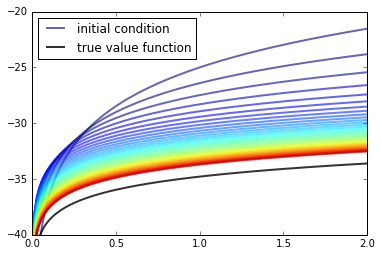

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy import log
from scipy.optimize import fminbound
from scipy import interp

alpha=0.65
beta=0.95
grid_max=2
grid_size=150
grid=np.linspace(1e-6, grid_max, grid_size)

ab=alpha*beta
c1=(log(1-ab)+log(ab)*ab/(1-ab))/(1-beta)
c2=alpha/(1-ab)

def v_star(k):
    return c1+c2*log(k)

def bellman_operator(w):
    Aw=lambda x: interp(x, grid, w)
    Tw=np.empty(grid_size)
    for i, k in enumerate(grid):
        objective=lambda c: -log(c)-beta*Aw(k**alpha-c)
        c_star=fminbound(objective, 1e-6, k**alpha)
        Tw[i]=-objective(c_star)
        
    return Tw

if __name__=='__main__':
    
    w=5*log(grid)-25
    n=35
    fig, ax=plt.subplots()
    ax.set_ylim(-40, -20)
    ax.set_xlim(np.min(grid), np.max(grid))
    lb='initial condition'
    ax.plot(grid, w, color=plt.cm.jet(0), lw=2, alpha=0.6, label=lb)
    for i in range(n):
        w=bellman_operator(w)
        ax.plot(grid, w, color=plt.cm.jet(i/n), lw=2, alpha=0.6)
    lb='true value function'
    ax.plot(grid, v_star(grid), 'k-', lw=2, alpha=0.8, label=lb)
    ax.legend(loc='upper left')
    
    plt.show()

In [ ]:
import scipy
w0=5*log(grid)-25
  
def w(i):
    if i==0:
        return w0
    else:
        return bellman_operator(w(i-1))
def wi(i, k):
    return interp(k, grid, w(i))
def c(i):
    ci0=[]
    for ki in grid:
        cgrid=np.linspace(1e-6, ki**alpha, grid_size*ki/grid_max)
        cc=lambda c: -(log(c)+beta*wi(i, ki**alpha-c))
        CC=[]
        c00=0
        for cd in cgrid:
            CC.append([cd, cc(cd)])
            CC.sort(key=lambda d: d[1])
            c00=CC[0][0]
        ci0.append(c00)
    return ci0
sigma=(1-alpha*beta)*grid**alpha
for i in [2, 4, 6]:
    fig, ax=plt.subplots()
    ax.set_ylim(0, 1)
    ax.set_xlim(np.min(grid), np.max(grid))
    lb='approximate optimal policy'
    ax.plot(grid, c(i), color='blue', lw=2, alpha=0.6, label=lb)
    lb='true optimal policy'
    ax.plot(grid, sigma, color='black', lw=2, alpha=0.6, label=lb)
    ax.legend(loc='upper left')
    ax.set_title('{} value function iterations'.format(i))
    plt.show()